In [4]:
import os
os.chdir('..')

In [5]:
pwd

'/mnt/md1/user_victor/automatic_melody_harmonization'

In [6]:
from pattern_scratch import SIA, find_beats
import numpy as np

In [5]:
# arr = [40, 40, 0, 0, 1, 1, 2, 3, 40, 40, 0, 0, 40, 40, 0, 0, 40, 40, 0, 0, 0]
# arr = [4, 0, 10, 2, 3, 5, 2, 3, 8, 9, 10, 0, 1, 6, 3, 7, 48, 8, 4, 5, 8]
arr = [4, 4, 2, 2, 3, 3, 3, 3, 5, 5, 5, 5, 5, 6, 6, 6, 3, 4, 4, 5, 8]

In [6]:
beats = find_beats(arr)
print(beats)

[2, 2, 4, 5, 3, 1, 2, 1, 1]


In [7]:
beats_seq = [[sum(beats[:i+1]),1] for i in range(len(beats))]


In [8]:
beats_seq

[[2, 1], [4, 1], [8, 1], [13, 1], [16, 1], [17, 1], [19, 1], [20, 1], [21, 1]]

In [9]:
pattern = SIA(beats_seq)

In [9]:
#pattern.table

In [10]:
pattern.count_dict

{'[2, 0]': 3,
 '[6, 0]': 2,
 '[11, 0]': 2,
 '[14, 0]': 1,
 '[15, 0]': 2,
 '[17, 0]': 2,
 '[18, 0]': 1,
 '[19, 0]': 1,
 '[4, 0]': 4,
 '[9, 0]': 2,
 '[12, 0]': 2,
 '[13, 0]': 2,
 '[16, 0]': 1,
 '[5, 0]': 2,
 '[8, 0]': 2,
 '[3, 0]': 3,
 '[7, 0]': 1,
 '[1, 0]': 3}

In [11]:
pattern.max_pattern()

(4, 0.5)

In [12]:
# Load chord sequence data
chord = np.load('./number_96.npy')
length = np.load('./length.npy')


In [16]:
r_pitch = []
r_rhythm = []
n = len(chord)

for i in range(n):
#     print(i)
    # Pitch pattern
    chord_seq = chord[i][:length[i]].flatten().tolist()
    input_chord_seq = [[i,chord_seq[i]] for i in range(len(chord_seq))]
    
    pitch_pattern = SIA(input_chord_seq)
    r_pitch.append(pitch_pattern.max_pattern()[1])
#     print('r_pitch',pitch_pattern.max_pattern()[1])
    
    # Rhythm pattern
    beat_seq = find_beats(chord_seq)
    input_beat_seq = [[sum(beat_seq[:i+1]),1] for i in range(len(beat_seq))]
    
    rhythm_pattern = SIA(input_beat_seq)
    r_rhythm.append(rhythm_pattern.max_pattern()[1])
#     print('r_rythm',rhythm_pattern.max_pattern()[1])

r_pitch = np.array(r_pitch)
r_rhythm = np.array(r_rhythm)

# np.save('pitch_pattern_ratio',r_pitch)
# np.save('rhythm_pattern_ratio',r_rhythm)

print('r_pitch',r_pitch.shape)
print('r_rythm',r_rhythm.shape)



r_pitch (17430,)
r_rythm (17430,)


In [13]:
length

array([17, 19, 17, ..., 48, 36,  9])

In [17]:
r_pitch

array([0.75      , 0.55555556, 0.5625    , ..., 0.9787234 , 0.51428571,
       0.75      ])

In [7]:
import torch
from torch.utils.data import DataLoader, Dataset
from dataloader import Parameterized_Dataset


In [8]:
batch_size = 512
epochs = 10
device = torch.device('cuda:1')
# validation data size
val_size = 500

# Load data
print('loading data...')
melody = np.load('./melody_baseline.npy')
chord = np.load('./number_96.npy')
chord_onehot = np.load('./onehot_96.npy')
length = np.load('./length.npy')
weight_chord = np.load('./weight_chord.npy')
r_pitch = np.load('./pitch_pattern_ratio.npy')
r_rhythm = np.load('./rhythm_pattern_ratio.npy')

#Splitting data
print('splitting validation set...')
train_melody = melody[val_size:]
val_melody = torch.from_numpy(melody[:val_size]).float()
train_chord = chord[val_size:]
val_chord = torch.from_numpy(chord[:val_size]).float()
train_chord_onehot = chord_onehot[val_size:]
val_chord_onehot = torch.from_numpy(chord_onehot[:val_size]).float()
train_length = length[val_size:]
val_length = torch.from_numpy(length[:val_size])
weight_chord = torch.from_numpy(weight_chord).float().to(device)

train_r_pitch = r_pitch[val_size:]
val_r_pitch = torch.from_numpy(r_pitch[:val_size]).float()
train_r_rhythm = r_rhythm[val_size:]
val_r_rhythm = torch.from_numpy(r_rhythm[:val_size])


loading data...
splitting validation set...


In [9]:
dataset = Parameterized_Dataset(train_melody, train_chord, train_length, train_chord_onehot, train_r_pitch, train_r_rhythm)


array([[1.        ],
       [0.66666667],
       [0.8       ],
       ...,
       [0.9787234 ],
       [0.51428571],
       [0.75      ]])

In [15]:
a = torch.rand(3)
b = torch.rand(4)
c = torch.rand(5)

In [19]:
torch.cat([a,b,c],dim = 0)

tensor([0.6345, 0.0175, 0.2102, 0.1199, 0.2041, 0.6056, 0.7898, 0.0696, 0.9217,
        0.0257, 0.1084, 0.7010])

In [1]:
import matplotlib.pyplot as plt

In [12]:
r_pitch = np.load('./pitch_pattern_ratio.npy')
r_rhythm = np.load('./rhythm_pattern_ratio.npy')

Text(0.5, 1.0, 'Rhythm_pattern_ratio distribution')

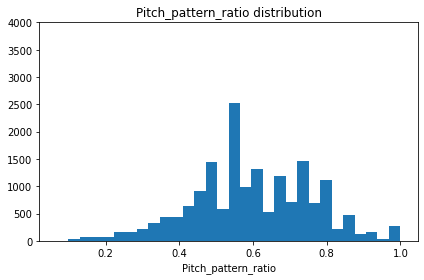

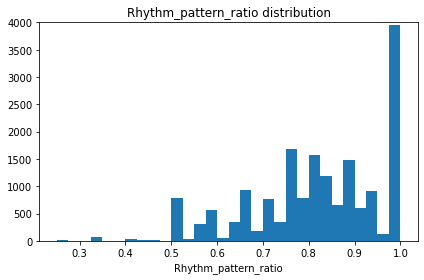

In [25]:
n_bins = 30

## Pitch
fig, ax = plt.subplots(tight_layout=True)

# We can set the number of bins with the `bins` kwarg
ax.hist(r_pitch, bins=n_bins)
ax.set_xlabel('Pitch_pattern_ratio')
ax.set_ylim([0,4000])
plt.title('Pitch_pattern_ratio distribution')

## Rhythm
fig, ax = plt.subplots(tight_layout=True)

# We can set the number of bins with the `bins` kwarg
ax.hist(r_rhythm, bins=n_bins)
ax.set_xlabel('Rhythm_pattern_ratio')
ax.set_ylim([0,4000])
plt.title('Rhythm_pattern_ratio distribution')